In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
jan = pd.read_parquet('fhv_tripdata_2021-01.parquet')
feb = pd.read_parquet('fhv_tripdata_2021-02.parquet')

In [3]:
jan.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037


In [4]:
'Q1. Jan records: {}'.format(jan.shape[0])

'Q1. Jan records: 1154112'

In [5]:
jan['pickup_datetime'] = pd.to_datetime(jan['pickup_datetime'])
jan['dropOff_datetime'] = pd.to_datetime(jan['dropOff_datetime'])
jan['duration'] = jan['dropOff_datetime'] - jan['pickup_datetime']
jan['duration'] = jan['duration'].apply(lambda td: td.total_seconds() / 60)

print('Q2. Jan average duration: {}'.format(jan['duration'].mean()))

#get rid of outliers
jan = jan[(jan['duration'] >= 1) & (jan['duration'] <= 60)]

jan['PUlocationID'] = jan['PUlocationID'].fillna(-1)
jan['DOlocationID'] = jan['DOlocationID'].fillna(-1)

Q2. Jan average duration: 19.167224093791006


In [6]:
feb['pickup_datetime'] = pd.to_datetime(feb['pickup_datetime'])
feb['dropOff_datetime'] = pd.to_datetime(feb['dropOff_datetime'])
feb['duration'] = feb['dropOff_datetime'] - feb['pickup_datetime']
feb['duration'] = feb['duration'].apply(lambda td: td.total_seconds() / 60)

feb['duration'].mean()

#get rid of outliers
feb = feb[(feb['duration'] >= 1) & (feb['duration'] <= 60)]

feb['PUlocationID'] = feb['PUlocationID'].fillna(-1)
feb['DOlocationID'] = feb['DOlocationID'].fillna(-1)

In [7]:
(jan['PUlocationID'] == -1).value_counts()

True     927008
False    182818
Name: PUlocationID, dtype: int64

In [8]:
'Q3. Percentage of PUlocationIDs missing: {}'.format(927008 / (927008 + 182818))

'Q3. Percentage of PUlocationIDs missing: 0.8352732770722617'

In [9]:
categorical = ['PUlocationID', 'DOlocationID']

jan[categorical] = jan[categorical].astype(str)
train_dicts = jan[categorical].to_dict(orient = 'records')

feb[categorical] = feb[categorical].astype(str)
val_dicts = feb[categorical].to_dict(orient = 'records')

In [10]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)


In [11]:
'Q4. Columns in training matrix: {}'.format(X_train.shape[1])

'Q4. Columns in training matrix: 525'

In [12]:
y_train = jan['duration'].values
y_val = feb['duration'].values

In [13]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [14]:
y_pred = lr.predict(X_train)
y_val_pred = lr.predict(X_val)

/home/jovyan/.conda/envs/jb-up/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/jovyan/.conda/envs/jb-up/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

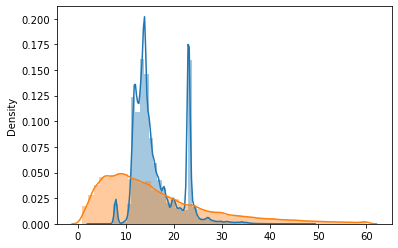

In [15]:
sns.distplot(y_pred, label = 'prediction')
sns.distplot(y_train, label = 'actual')

<AxesSubplot:ylabel='Count'>

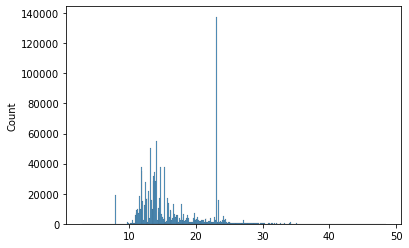

In [16]:
sns.histplot(y_pred, label = 'prediction')

In [17]:
'Q5. Train RMSE: {}'.format(mean_squared_error(y_train, y_pred, squared = False))

'Q5. Train RMSE: 10.52851937201585'

In [18]:
'Q6. Val RMSE: {}'.format(mean_squared_error(y_val, y_val_pred, squared = False))

'Q6. Val RMSE: 11.014287893805665'